In [2]:
import os
import sys
import argparse
import numpy as np
import scipy
from scipy import stats 
import pandas as pd

import os
from collections import OrderedDict
from adjustText import adjust_text

In [4]:
import matplotlib
matplotlib.__version__

'2.2.3'

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [6]:
colors_10 = cm.get_cmap('tab10', 10)

In [7]:
from astropy.table import Table
data_Trump2011=Table.read('ftp://cdsarc.u-strasbg.fr/pub/cats/J/ApJ/733/60/table2.dat',
                      readme="ftp://cdsarc.u-strasbg.fr/pub/cats/J/ApJ/733/60/ReadMe",
                      format="ascii.cds",)

In [8]:
Trump2011_type=[]
for i in data_Trump2011['Type']:
    if i not in Trump2011_type:
        Trump2011_type.append(i)


/Users/brettlv/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'logL')

/Users/brettlv/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


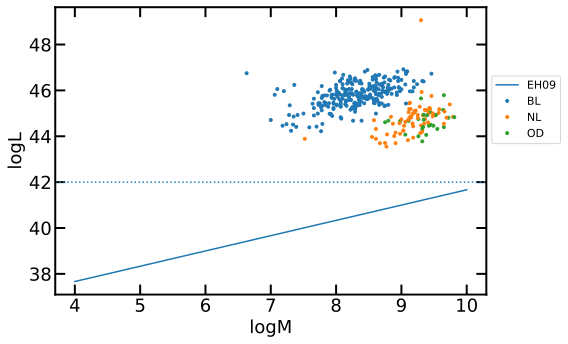

In [9]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Trump2011['logL'])):
    if data_Trump2011['Type'][i]==Trump2011_type[0]:
        label=r'BL'
        color=colors_10(0)
        
    elif data_Trump2011['Type'][i]==Trump2011_type[1]:
        label=r'NL'
        color=colors_10(1)
        
    elif data_Trump2011['Type'][i]==Trump2011_type[2]:
        label=r'OD'
        color=colors_10(2)        
        
    ax.errorbar(data_Trump2011['logM'][i], data_Trump2011['logL'][i],#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
#log L = 35 +2/3log M     
LogM_x=np.linspace(4,10,20)
logL_y = 35+ 2.0/3 *LogM_x
ax.plot(LogM_x,logL_y,label="EH09")
ax.axhline(42,ls=':')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
    
#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('logM')
plt.ylabel('logL')